# **Data Manipulation with Pandas Part 1**

**Modul DQLab** membahas library Python paling terkenal untuk kebutuhan Data Analyst, Data Engineer atau Data Scientist, yakni Pandas. Pandas adalah salah satu library open source yang dapat diandalkan ketika berurusan dengan data tabular seperti csv atau excel. Dengan data manipulation kamu akan dapat membaca file, menerapkan indexing, melakukan filter, joining data, ataupun menulis file ke bentuk lain. Dipadukan dengan fungsi-fungsi built in yang ada di python membuat library ini makin canggih dan mudah dimanfaatkan.

1. Introduction to Pandas
2. Dataset I/O
3. Indexing, Slicing, and Transforming
4. Handling Missing Values
5. Mini Project

## **Introduction to Pandas**

### **Memanggil Library Pandas**

Pandas adalah library python open source yang biasanya digunakan untuk kebutuhan data analisis. Pandas membuat Python supaya dapat bekerja dengan data yang berbentuk tabular seperti spreadsheet dengan cara pemuatan data yang cepat, manipulasi data, menggabungkan data, serta ada berbagai fungsi yang lain.

Biasanya ketika menggunakan library Pandas, library Numpy juga di import.

In [1]:
import pandas as pd
import numpy as np

### **DataFrame & Series**

Di Pandas terdapat 2 kelas data baru yang digunakan sebagai struktur dari spreadsheet:
1. Series: satu kolom bagian dari tabel dataframe yang merupakan 1 dimensional numpy array sebagai basis datanya, terdiri dari 1 tipe data (integer, string, float, dll).
2. DataFrame: gabungan dari Series, berbentuk rectangular data yang merupakan tabel spreadsheet itu sendiri (karena dibentuk dari banyak Series, tiap Series biasanya punya 1 tipe data, yang artinya 1 dataframe bisa memiliki banyak tipe data).

In [2]:
# Series
number_list = pd.Series([1,2,3,4,5,6])
print("Series:")
print(number_list)
# DataFrame
matrix = [[1,2,3],
          ['a','b','c'],
          [3,4,5],
          ['d',4,6]]
matrix_list = pd.DataFrame(matrix)
print("DataFrame:")
print(matrix_list)

Series:
0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
DataFrame:
   0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6


### **Atribut DataFrame & Series - Part 1**
DataFrame dan Series memiliki sangat banyak atribut yang digunakan untuk transformasi data, tetapi ada beberapa yang sering dipakai.

1. Attribute `.info()` digunakan untuk mengecek kolom apa yang membentuk dataframe itu, data types, berapa yang non null, dll. Atribut ini tidak dapat digunakan pada series, hanya pada dataframe saja.

2. Attribute `.shape` digunakan untuk mengetahui berapa baris dan kolom, hasilnya dalam format tuple (baris, kolom).

3. Attribute `.dtypes` .dtypes digunakan untuk mengetahui tipe data di tiap kolom. Tipe data object: kombinasi untuk berbagai tipe data (number & text, etc).

4. Attribute `.astype(nama_tipe_data)` digunakan untuk convert tipe data berdasarkan tipe data seperti: float, int, str, numpy.float, numpy.int, ataupun numpy.datetime.


In [3]:
# [1] attribute .info()
print("[1] attribute .info()")
print(matrix_list.info())
# [2] attribute .shape
print("\n[2] attribute .shape")
print("    Shape dari number_list:", number_list.shape)
print("    Shape dari matrix_list:", matrix_list.shape)
# [3] attribute .dtypes
print("\n[3] attribute .dtypes")
print("    Tipe data number_list:", number_list.dtypes)
print("    Tipe data matrix_list:", matrix_list.dtypes)
# [4] attribute .astype()
print("\n[4] attribute .astype()")
print("    Konversi number_list ke str:", number_list.astype("str"))
print("    Konversi matrix_list ke str:", matrix_list.astype("str"))

[1] attribute .info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4 non-null      object
 1   1       4 non-null      object
 2   2       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes
None

[2] attribute .shape
    Shape dari number_list: (6,)
    Shape dari matrix_list: (4, 3)

[3] attribute .dtypes
    Tipe data number_list: int64
    Tipe data matrix_list: 0    object
1    object
2    object
dtype: object

[4] attribute .astype()
    Konversi number_list ke str: 0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
    Konversi matrix_list ke str:    0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6


### **Atribut DataFrame & Series - Part 2**

5. Attribute `.copy()` digunakan melakukan duplikat, untuk disimpan di variabel yang berbeda mungkin supaya tidak loading data lagi.

6. Attribute `.to_list()` digunakan untuk mengubah series menjadi list dan tidak dapat digunakan untuk dataframe.

7. Attribute `.unique()` digunakan menghasilkan nilai unik dari suatu kolom, hasilnya dalam bentuk numpy array. Atribut ini hanya digunakan pada series saja.

In [4]:
# [5] attribute .copy()
print("[5] attribute .copy()")
num_list = number_list.copy()
print("    Copy number_list ke num_list:", num_list)
mtr_list = matrix_list.copy()
print("    Copy matrix_list ke mtr_list:", mtr_list)	
# [6] attribute .to_list()
print("[6] attribute .to_list()")
print(number_list.to_list())
# [7] attribute .unique()
print("[7] attribute .unique()")
print(number_list.unique())

[5] attribute .copy()
    Copy number_list ke num_list: 0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
    Copy matrix_list ke mtr_list:    0  1  2
0  1  2  3
1  a  b  c
2  3  4  5
3  d  4  6
[6] attribute .to_list()
[1, 2, 3, 4, 5, 6]
[7] attribute .unique()
[1 2 3 4 5 6]


### **Atribut DataFrame & Series - Part 3**

8. Attribute `.index` digunakan untuk mencari index/key dari Series atau Dataframe.

9. Attribute `.columns` digunakan untuk mengetahui apa saja kolom yang tersedia di dataframe tersebut (hanya digunakan untuk dataframe saja).

10. Attribute `.loc` digunakan untuk slice dataframe atau series berdasarkan nama kolom dan/atau nama index.

11. Attribute `.iloc` digunakan untuk slice dataframe atau series berdasarkan index kolom dan/atau index.

In [5]:
# [8] attribute .index
print("[8] attribute .index")
print("    Index number_list:", number_list.index)
print("    Index matrix_list:", matrix_list.index)	
# [9] attribute .columns
print("[9] attribute .columns")
print("    Column matrix_list:", matrix_list.columns)
# [10] attribute .loc
print("[10] attribute .loc")
print("    .loc[0:1] pada number_list:", number_list.loc[0:1])
print("    .loc[0:1] pada matrix_list:", matrix_list.loc[0:1])
# [11] attribute .iloc
print("[11] attribute .iloc")
print("    iloc[0:1] pada number_list:", number_list.iloc[0:1])
print("    iloc[0:1] pada matrix_list:", matrix_list.iloc[0:1])	

[8] attribute .index
    Index number_list: RangeIndex(start=0, stop=6, step=1)
    Index matrix_list: RangeIndex(start=0, stop=4, step=1)
[9] attribute .columns
    Column matrix_list: RangeIndex(start=0, stop=3, step=1)
[10] attribute .loc
    .loc[0:1] pada number_list: 0    1
1    2
dtype: int64
    .loc[0:1] pada matrix_list:    0  1  2
0  1  2  3
1  a  b  c
[11] attribute .iloc
    iloc[0:1] pada number_list: 0    1
dtype: int64
    iloc[0:1] pada matrix_list:    0  1  2
0  1  2  3


### **Creating Series & Dataframe from List**

Untuk membuat Series atau Dataframe bisa dari berbagai macam tipe data container/mapping di python, seperti list dan dictionary, maupun dari numpy array.

Sekadar meninjau bahwa list merupakan sebuah kumpulan data berbagai macam tipe data yang mutable (dapat diganti).

Contoh membuat series dari **list**:


In [7]:
# Creating series from list
ex_list = ['a',1,3,5,'c','d']
ex_series = pd.Series(ex_list)
print(ex_series)
# Creating dataframe from list of list
ex_list_of_list = [[1, 'a', 'b', 'c'],
                   [2.5, 'd', 'e', 'f'],
		           [5, 'g', 'h', 'i'],
		           [7.5, 'j', 10.5, 'l']]
index = ['dq', 'lab', 'kar', 'lan']
cols = ['float', 'char', 'obj', 'char']
ex_df = pd.DataFrame(ex_list_of_list, index=index, columns=cols)
print(ex_df)

0    a
1    1
2    3
3    5
4    c
5    d
dtype: object
     float char   obj char
dq     1.0    a     b    c
lab    2.5    d     e    f
kar    5.0    g     h    i
lan    7.5    j  10.5    l


### **Creating Series & Dataframe from Dictionary**

Sekadar meninjau bahwa dictionary merupakan kumpulan data yang strukturnya terdiri dari key dan value.

Contoh membuat series dari **dictionary**:

In [6]:
# Creating series from dictionary
dict_series = {'1':'a',
			   '2':'b',
			   '3':'c'}
ex_series = pd.Series(dict_series)
print(ex_series)
# Creating dataframe from dictionary
df_series = {'1':['a','b','c'],
             '2':['b','c','d'],
             '4':[2,3,'z']}
ex_df = pd.DataFrame(df_series)
print(ex_df)

1    a
2    b
3    c
dtype: object
   1  2  4
0  a  b  2
1  b  c  3
2  c  d  z


### **Creating Series & Dataframe from Numpy Array**

Sekadar meninjau bahwa numpy array merupakan kumpulan data yang terdiri atas berbagai macam tipe data, mutable, tapi dibungkus dalam array oleh library Numpy.

Contoh membuat series dari **numpy array 1D**:


In [8]:
# Creating series from numpy array (1D)
arr_series = np.array([1,2,3,4,5,6,6,7])
ex_series = pd.Series(arr_series)
print(ex_series)
# Creating dataframe from numpy array (2D)
arr_df = np.array([[1,2,3,5],
                   [5,6,7,8],
                   ['a','b','c',10]])
ex_df = pd.DataFrame(arr_df)
print(ex_df)

0    1
1    2
2    3
3    4
4    5
5    6
6    6
7    7
dtype: int64
   0  1  2   3
0  1  2  3   5
1  5  6  7   8
2  a  b  c  10


## **Dataset I/O**

### **Pendahuluan**

Pandas menyediakan berbagai method untuk membaca file tersebut hanya dengan dipanggil method itu, code yang lebih simple dan loading yang lebih, tentu saja output nya dapat berupa Series atau Dataframe.

Terdapat sangat banyak file yang dapat dibaca/dapat disimpan oleh Pandas, tapi ada beberapa file yang paling umum dan sering digunakan oleh praktisi data seperti berikut ini:
1. CSV (Comma Separated Values), antar data dalam satu baris dipisahkan oleh comma, ",".
2. TSV (Tab Separated Values), antar data dalam satu baris dipisahkan oleh "Tab".
3. Excel
4. Google BigQuery
5. SQL Query
6. JSON (Java Script Object Notation)

### **Read Dataset - CSV dan TSV**

CSV dan TSV pada hakikatnya adalah tipe data text dengan perbedaan terletak pada pemisah antar data dalam satu baris. 

Fungsi `.read_csv()` digunakan untuk membaca file yang value-nya dipisahkan oleh comma (default), terkadang pemisah value-nya bisa di set '\t' untuk file tsv (tab separated values).

In [9]:
# File CSV
df_csv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
print(df_csv.head(3)) # Menampilkan 3 data teratas
# File TSV
df_tsv = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep='\t')
print(df_tsv.head(3)) # Menampilkan 3 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  


### **Read Dataset - Excel**

File Excel dengan ekstensi *.xls atau *.xlsx cukup banyak digunakan dalam menyimpan data. Pandas juga memiliki fitur untuk membaca file excel.

Fungsi `.read_excel()` digunakan untuk membaca file excel menjadi dataframe pandas.

In [10]:
# File xlsx dengan data di sheet "test"
df_excel = pd.read_excel("https://storage.googleapis.com/dqlab-dataset/sample_excel.xlsx", sheet_name="test")
print(df_excel.head(4)) # Menampilkan 4 data teratas

   order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
3  BRAND_B        12      450000  


### **Read Dataset - JSON**

Method `.read_json()` digunakan untuk membaca URL API yang formatnya JSON dan mengubahnya menjadi dataframe pandas. 

In [13]:
# File JSON
url = "https://storage.googleapis.com/dqlab-dataset/covid2019-api-herokuapp-v2.json"
df_json = pd.read_json(url)
print(df_json.head(10)) # Menampilkan 10 data teratas

                                                data          dt          ts
0  {'location': 'US', 'confirmed': 3363056, 'deat...  07-14-2020  1594684800
1  {'location': 'Brazil', 'confirmed': 1884967, '...  07-14-2020  1594684800
2  {'location': 'India', 'confirmed': 906752, 'de...  07-14-2020  1594684800
3  {'location': 'Russia', 'confirmed': 732547, 'd...  07-14-2020  1594684800
4  {'location': 'Peru', 'confirmed': 330123, 'dea...  07-14-2020  1594684800
5  {'location': 'Chile', 'confirmed': 317657, 'de...  07-14-2020  1594684800
6  {'location': 'Mexico', 'confirmed': 304435, 'd...  07-14-2020  1594684800
7  {'location': 'United Kingdom', 'confirmed': 29...  07-14-2020  1594684800
8  {'location': 'South Africa', 'confirmed': 2877...  07-14-2020  1594684800
9  {'location': 'Iran', 'confirmed': 259652, 'dea...  07-14-2020  1594684800


### **Read Dataset - SQL**

Fungsi `.read_sql()` atau `.read_sql_query()` digunakan untuk membaca query dari database dan translate menjadi pandas dataframe.


### **Read Dataset - Google BigQuery**

Untuk data yang besar (big data), umumnya digunakan Google BigQuery. Layanan ini dapat digunakan jika telah memiliki akun.

Fungsi `.read_gbq()` digunakan untuk membaca Google BigQuery tabel menjadi dataframe pandas.

### **Write Dataset**
Dalam bekerja sebagai data scientist/analis setelah dilakukan data cleaning dataset yang sudah rapi tentunya disimpan terlebih dahulu ke media penyimpanan.

Pandas menyediakan fitur demikian secara ringkas melalui penerapan method pada dataframe/series yang ditabelkan berikut ini:

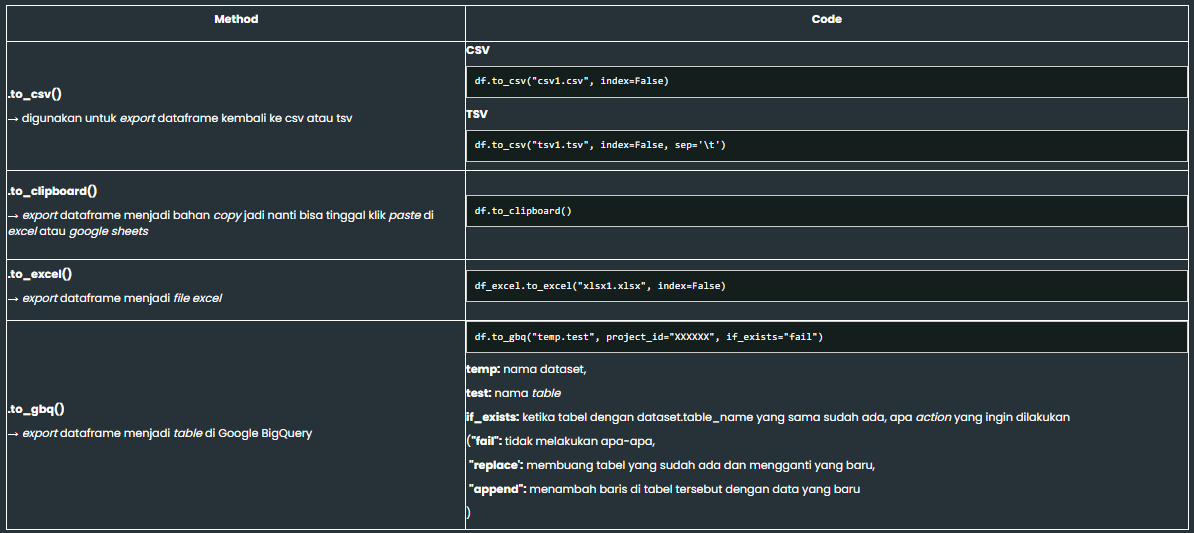

### **Head & Tail**

Method .head ditujukan untuk membatasi tampilan jumlah baris teratas dari dataset. Sementara itu, method .tail ditujukan untuk membatasi jumlah baris terbawah dari dataset.

Secara umum kedua method ini memiliki bentuk
`[nama_dataframe].head(n)`
dan
`[nama_dataframe].tail(n)`
dengan n merupakan jumlah baris yang akan ditampilkan, jika tidak disebutkan n = 5 (sebagai nilai default dari n).

In [14]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan 3 data teratas
print("Tiga data teratas:\n", df.head(3))
# Tampilkan 3 data terbawah
print("Tiga data terbawah:\n", df.tail(3))

Tiga data teratas:
    order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8      604000  
2  BRAND_G        12      747000  
Tiga data terbawah:
      order_id  order_date  customer_id      city          province product_id  \
98    1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P3354   
99    1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P3357   
100   1612390  2019-01-01        12681  Makassar  Sulawesi Selatan      P0422   

       brand  quantity  item_price  
98   BRAND_S        24      450000  
99   BRAND_S        24      450000  
100  BRAND_B         4     1325000  


## **Indexing, Slicing, dan Transforming**

### **Indexing - Part 1**

Index merupakan key identifier dari tiap row/column untuk Series atau DataFrame (sifatnya tidak mutable untuk masing-masing value tapi bisa diganti untuk semua value sekaligus).

Jika tidak disediakan, pandas akan membuat kolom index default secara otomatis sebagai bilangan bulat (integer) dari 0 sampai range jumlah baris data tersebut.

Kolom index dapat terdiri dari:
1. Satu kolom (single index), atau
2. Multiple kolom (disebut dengan hierarchical indexing)

Index dengan multiple kolom ini terjadi karena unique identifier tidak dapat dicapai hanya dengan set index di 1 kolom saja sehingga membutuhkan beberapa kolom yang menjadikan tiap row menjadi unique.

### **Indexing - Part 2**

Secara default setelah suatu dataframe dibaca dari file dengan format tertentu, index-nya merupakan single index. 

Untuk menentukan index dan kolom yang dimiliki oleh dataset yan telah dinyatakan sebagai sebuah dataframe pandas dapat dilakukan dengan menggunakan atribut `.index` dan `.columns`.

In [15]:
# Baca file TSV sample_tsv.tsv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t")
# Index dari df
print("Index:", df.index)
# Column dari df
print("Columns:", df.columns)

Index: RangeIndex(start=0, stop=101, step=1)
Columns: Index(['order_id', 'order_date', 'customer_id', 'city', 'province',
       'product_id', 'brand', 'quantity', 'item_price'],
      dtype='object')


### **Indexing - Part 3**

Untuk membuat multi index (hierarchical indexing) dengan pandas diperlukan kolom-kolom mana saja yang perlu disusun agar index dari dataframe menjadi sebuah hirarki yang kemudian dapat dikenali.

Perlu diketahui bahwa kumpulan index dari multi index adalah list dari banyak tuples, tuples-nya merupakan kombinasi yang ada dari gabungan index-index tersebut. Dari multi index tersebut juga terdapat atribut levels yang menunjukkan urutan index.

In [16]:
# Set multi index df
df_x = df.set_index(['order_date', 'city', 'customer_id'])
# Print nama dan level dari multi index
for name, level in zip(df_x.index.names, df_x.index.levels):
    print(name,':',level)

order_date : Index(['2019-01-01'], dtype='object', name='order_date')
city : Index(['Bogor', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Utara',
       'Makassar', 'Malang', 'Surabaya', 'Tangerang'],
      dtype='object', name='city')
customer_id : Int64Index([12681, 13963, 15649, 17091, 17228, 17450, 17470, 17511, 17616,
            18055],
           dtype='int64', name='customer_id')


### **Indexing - Part 4**

Terdapat beberapa cara untuk membuat index, salah satunya dengan menggunakan method `.set_index()`. 

Note: Jika ingin kembalikan dataframe ke index default-nya yaitu dari 0 s/d jumlah baris data - 1, maka dapat menggunakan method `.reset_index(drop=True)`, argument drop=True bertujuan untuk menghapus index lama.

In [17]:
# Baca file sample_tsv.tsv untuk 10 baris pertama saja
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", nrows=10)
# Cetak data frame awal
print("Dataframe awal:\n", df)
# Set index baru
df.index = ["Pesanan ke-" + str(i) for i in range(1, 11)]
# Cetak data frame dengan index baru
print("Dataframe dengan index baru:\n", df)

Dataframe awal:
    order_id  order_date  customer_id             city     province product_id  \
0   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0648   
1   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3826   
2   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1508   
3   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P0520   
4   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1513   
5   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3911   
6   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1780   
7   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P3132   
8   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P1342   
9   1612339  2019-01-01        18055  Jakarta Selatan  DKI Jakarta      P2556   

     brand  quantity  item_price  
0  BRAND_C         4     1934000  
1  BRAND_V         8 

### **Indexing - Part 5**

Jika file yang akan dibaca melalui penggunaan library pandas dapat di-preview terlebih dahulu struktur datanya maka melalui fungsi yang ditujukan untuk membaca file dapat di set mana kolom yang akan dijadikan index.

Fitur ini telah dimiliki oleh setiap fungsi yang digunakan dalam membaca data dengan pandas, yaitu penggunaan argumen index_col pada fungsi yang dimaksud.

Berikut kode dengan kolom 'order_date' dan 'order_id' sebagai index_col-nya:


In [18]:
# Baca file sample_tsv.tsv dan set lah index_col sesuai instruksi
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_tsv.tsv", sep="\t", index_col=["order_date","order_id"])
# Cetak data frame untuk 8 data teratas
print("Dataframe:\n", df.head(8))

Dataframe:
                      customer_id             city     province product_id  \
order_date order_id                                                         
2019-01-01 1612339         18055  Jakarta Selatan  DKI Jakarta      P0648   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3826   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1508   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P0520   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1513   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3911   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P1780   
           1612339         18055  Jakarta Selatan  DKI Jakarta      P3132   

                       brand  quantity  item_price  
order_date order_id                                 
2019-01-01 1612339   BRAND_C         4     1934000  
           1612339   BRAND_V         8      604000  
     

### **Slicing - Part 1**

Seperti artinya slicing adalah cara untuk melakukan filter ke dataframe/series berdasarkan kriteria tertentu dari nilai kolomnya ataupun kriteria index-nya.

Terdapat 2 cara paling terkenal untuk slicing dataframe, yaitu dengan menggunakan method .loc dan .iloc pada variabel bertipe pandas Dataframe/Series. Method .iloc ditujukan untuk proses slicing berdasarkan index berupa nilai integer tertentu. Akan tetapi akan lebih sering menggunakan dengan menthod .loc karena lebih fleksibel.

In [19]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Slice langsung berdasarkan kolom
df_slice = df.loc[(df["customer_id"] == 18055) &
		          (df["product_id"].isin(["P0029","P0040","P0041","P0116","P0117"]))
				 ]
print("Slice langsung berdasarkan kolom:\n", df_slice)

Slice langsung berdasarkan kolom:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price]
Index: []


### **Slicing - Part 2**

Menerapkan slicing berdasarkan index. Tentu syaratnya adalah dataset sudah dilakukan indexing terlebih dahulu melalui penerapan method `.set_index`.

Cara 1: Menggunakan method `.loc`

Cara 2: Menggunakan `pd.IndexSlice` sebagai variabel untuk melakukan slicing index

Intruksi:
Baca kembali file "sample_csv.csv" dan set terlebih dahulu index-nya yaitu order_date, order_id, dan product_id. Kemudian slice/filter-lah dataset jika order_date adalah 2019-01-01, order_id adalah 1612339, dan product_id-nya yaitu P2154 dan P2159. Gunakanlah method .loc.

In [22]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Set index dari df sesuai instruksi
df = df.set_index(["order_date","order_id","product_id"])
# Slice sesuai intruksi
df_slice = df.loc[("2019-01-01",1612339,["P2154","P2159"]),:]
print("Slice df:\n", df_slice)

Slice df:
                                 customer_id             city     province  \
order_date order_id product_id                                              
2019-01-01 1612339  P2154             18055  Jakarta Selatan  DKI Jakarta   
                    P2159             18055  Jakarta Selatan  DKI Jakarta   

                                  brand  quantity  item_price  
order_date order_id product_id                                 
2019-01-01 1612339  P2154       BRAND_M         4     1745000  
                    P2159       BRAND_M        24      310000  


In [23]:
# Contoh lain
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Set index dari df
df = df.set_index(["order_date","product_id"])

# Cara 1: Gunakan .loc
df_slice1 = df.loc[("2019-01-01",["P2154","P2556"]),:]
print("Cara 1:\n", df_slice1)

# Cara 2: Gunakan pd.IndexSlice dan terapkan .loc 
idx = pd.IndexSlice
df_slice2 = df.sort_index().loc[idx["2019-01-01", "P2154":"P2556"], :]
print("Cara 2:\n", df_slice2)

Cara 1:
                        order_id  customer_id             city     province  \
order_date product_id                                                        
2019-01-01 P2154        1612339        18055  Jakarta Selatan  DKI Jakarta   
           P2556        1612339        18055  Jakarta Selatan  DKI Jakarta   

                         brand  quantity  item_price  
order_date product_id                                 
2019-01-01 P2154       BRAND_M         4     1745000  
           P2556       BRAND_P         6     1045000  
Cara 2:
                        order_id  customer_id             city     province  \
order_date product_id                                                        
2019-01-01 P2154        1612339        18055  Jakarta Selatan  DKI Jakarta   
           P2159        1612339        18055  Jakarta Selatan  DKI Jakarta   
           P2325        1612372        17511        Tangerang       Banten   
           P2494        1612372        17511        Tangera

### **Transforming - Part 1**

Transform adalah ketika mengubah dataset yang ada menjadi entitas baru, dapat dilakukan dengan:
* konversi dari satu data type ke data type yang lain,
* transpose dataframe,
* atau yang lainnya.

Hal yang biasa dilakukan pertama kali setelah data dibaca adalah mengecek tipe data di setiap kolomnya apakah sesuai dengan representasinya. Untuk itu dapat menggunakan atribut `.dtypes` pada dataframe.

Untuk merubah kolom yang sebelumnya bertipe object menjadi kolom bertipe datetime, cara pertama yang dapat dilakukan adalah menggunakan:
`pd.to_datetime(argumen)`
dengan argumen adalah isi kolom dari dataframe yang akan dirubah tipe datanya, misal dalam format umum:
`nama_dataframe["nama_kolom"]`



In [24]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom order_date menjadi datetime
df["order_date"] = pd.to_datetime(df["order_date"])
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id                int64
order_date     datetime64[ns]
customer_id             int64
city                   object
province               object
product_id             object
brand                  object
quantity                int64
item_price              int64
dtype: object


### **Transforming - Part 2**

Secara umum, untuk mengubah tipe data ke numerik dapat menggunakan pd.to_numeric(), yaitu:
`pd.to_numeric(nama_dataframe["nama_kolom"], downcast="tipe_data_baru")`

Sedangkan untuk menjadi suatu kolom yang dapat dinyatakan sebagai kategori dapat menggunakan method .astype() pada dataframe, yaitu:
`nama_dataframe["nama_kolom"].astype("category")`


In [25]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Tampilkan tipe data
print("Tipe data df:\n", df.dtypes)
# Ubah tipe data kolom quantity menjadi tipe data numerik float
df["quantity"] = pd.to_numeric(df["quantity"], downcast="float")
# Ubah tipe data kolom city menjadi tipe data category
df["city"] = df["city"].astype("category")
# Tampilkan tipe data df setelah transformasi
print("\nTipe data df setelah transformasi:\n", df.dtypes)

Tipe data df:
 order_id        int64
order_date     object
customer_id     int64
city           object
province       object
product_id     object
brand          object
quantity        int64
item_price      int64
dtype: object

Tipe data df setelah transformasi:
 order_id          int64
order_date       object
customer_id       int64
city           category
province         object
product_id       object
brand            object
quantity        float32
item_price        int64
dtype: object


### **Transforming - Part 3**

Method `.apply()` digunakan untuk menerapkan suatu fungsi python (yang dibuat dengan def atau anonymous dengan lambda) pada dataframe/series atau hanya kolom tertentu dari dataframe.

Method `.map()` hanya dapat diterapkan pada series atau dataframe yang diakses satu kolom saja. Method ini digunakan untuk mensubtitusikan suatu nilai ke dalam tiap baris datanya.

In [26]:
# Baca file sample_csv.csv
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/sample_csv.csv")
# Cetak 5 baris teratas kolom brand
print("Kolom brand awal:\n", df["brand"].head())
# Gunakan method apply untuk merubah isi kolom menjadi lower case
df["brand"] = df["brand"].apply(lambda x: x.lower())
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah apply:\n", df["brand"].head())
# Gunakan method map untuk mengambil kode brand yaitu karakter terakhirnya
df["brand"] = df["brand"].map(lambda x: x[-1])
# Cetak 5 baris teratas kolom brand
print("Kolom brand setelah map:\n", df["brand"].head())

Kolom brand awal:
 0    BRAND_C
1    BRAND_V
2    BRAND_G
3    BRAND_B
4    BRAND_G
Name: brand, dtype: object
Kolom brand setelah apply:
 0    brand_c
1    brand_v
2    brand_g
3    brand_b
4    brand_g
Name: brand, dtype: object
Kolom brand setelah map:
 0    c
1    v
2    g
3    b
4    g
Name: brand, dtype: object


### **Transforming - Part 4**

Penggunaaan method `.applymap` pada dataframe.

In [27]:
# number generator, set angka seed menjadi suatu angka, bisa semua angka, supaya hasil random nya selalu sama ketika kita run
np.random.seed(1234)
# create dataframe 3 baris dan 4 kolom dengan angka random
df_tr = pd.DataFrame(np.random.rand(3,4))
# Cetak dataframe
print("Dataframe:\n", df_tr)
# Cara 1 dengan tanpa define function awalnya, langsung pake fungsi anonymous lambda x
df_tr1 = df_tr.applymap(lambda x: x**2 + 3*x +2) 
print("\nDataframe - cara 1:\n", df_tr1)
# Cara 2 dengan define function 
def qudratic_fun(x):
	return x**2 + 3*x + 2
df_tr2 = df_tr.applymap(qudratic_fun)
print("\nDataframe - cara 2:\n", df_tr2)

Dataframe:
           0         1         2         3
0  0.191519  0.622109  0.437728  0.785359
1  0.779976  0.272593  0.276464  0.801872
2  0.958139  0.875933  0.357817  0.500995

Dataframe - cara 1:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981

Dataframe - cara 2:
           0         1         2         3
0  2.611238  4.253346  3.504789  4.972864
1  4.948290  2.892085  2.905825  5.048616
2  5.792449  5.395056  3.201485  3.753981


## **Handling Missing Values**



### **Inspeksi Missing Value**

Value yang hilang/tidak lengkap dari dataframe akan membuat analisis atau model prediksi yang dibuat menjadi tidak akurat dan mengakibatkan keputusan salah yang diambil. 

Di pandas data yang hilang umumnya direpresentasikan dengan NaN.

Pertama harus tahu kolom mana yang terdapat data hilang dan berapa banyak untuk ditelaah. Dengan cara sbb:

Cara 1: Menerapkan method `.info()` pada dataframe.

Cara 2: Mengetahui berapa banyak nilai yang hilang dari tiap kolom di dataset tersebut dengan menerapkan chaining method pada dataframe yaitu `.isna().sum()`. Method .isna() digunakan untuk mengecek berapa data yang bernilai NaN dan .sum() menjumlahkannya secara default untuk masing-masing kolom dataframe.



In [30]:
import pandas as pd
# Baca file "public data covid19 jhu csse eu.csv"
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/CHAPTER+4+-+missing+value+-+public+data+covid19+.csv")
# Cetak info dari df
print(df.info())
# Cetak jumlah missing value di setiap kolom
mv = df.isna().sum()
print("\nJumlah missing value per kolom:\n", mv)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  960 non-null    object 
 1   country_region  1000 non-null   object 
 2   date            1000 non-null   object 
 3   latitude        874 non-null    float64
 4   longitude       874 non-null    float64
 5   location_geom   874 non-null    object 
 6   confirmed       1000 non-null   int64  
 7   deaths          999 non-null    float64
 8   recovered       999 non-null    float64
 9   active          949 non-null    float64
 10  fips            949 non-null    float64
 11  admin2          842 non-null    object 
 12  combined_key    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 101.7+ KB
None

Jumlah missing value per kolom:
 province_state      40
country_region       0
date                 0
latitude           126
longitude          126
l

### **Treatment untuk Missing Value**

Terdapat beberapa cara untuk mengatasi missing value, antara lain:
1. dibiarkan saja,
2. hapus value itu, atau
3. isi value tersebut dengan value yang lain (biasanya interpolasi, mean, median, etc)

Untuk memahami mana kolom yang akan di treatment dengan tiga perlakuan di atas lihat nature dari data terlebih dahulu.

> **Treatment Pertama**

Membiarkan saja kolom memiliki nilai missing value yaitu pada kolom confirmed, death, dan recovered.

> **Treatment Kedua**

Menghapus kolom dapat digunakan jika seluruh kolom dari dataset yang dipunyai semua barisnya adalah missing value dengan, `nama_dataframe.dropna(axis=1, how="all")`

Keyword axis digunakan untuk menentukan arah dataframe yang akan dibuang, angka 1 untuk menyatakan kolom (column-based) atau dapat ditulis dalam string "column". Jika digunakan angka 0 berarti itu dalam searah index (row-based) atau dapat ditulis dalam string "index".

Keyword how digunakan untuk bagaimana cara membuangnya. Opsi yang dapat diterimanya (dalam string) adalah:
*   "all" artinya jika seluruh data di satu/beberapa kolom atau di satu/beberapa baris adalah missing value.
*   "any" artinya jika memiliki 1 saja data yang hilang maka buanglah baris/kolom tersebut.

In [31]:
# Cetak ukuran awal dataframe
print("Ukuran awal df: %d baris, %d kolom." % df.shape)
# Drop kolom yang seluruhnya missing value dan cetak ukurannya
df = df.dropna(axis=1, how="all")
print("Ukuran df setelah buang kolom dengan seluruh data missing: %d baris, %d kolom." % df.shape)
# Drop baris jika ada satu saja data yang missing dan cetak ukurannya
df = df.dropna(axis=0, how="any")
print("Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: %d baris, %d kolom." % df.shape)

Ukuran awal df: 1000 baris, 13 kolom.
Ukuran df setelah buang kolom dengan seluruh data missing: 1000 baris, 12 kolom.
Ukuran df setelah dibuang baris yang memiliki sekurangnya 1 missing value: 746 baris, 12 kolom.


> **Treatment Ketiga**

Mengisi missing value dengan nilai lain menggunakan method `.fillna()` pada kolom dataframe yang dimaksud, dapat berupa:

*   text tertentu
*   nilai statistik seperti mean atau median
*   interpolasi data   

In [33]:
# Baca file "public data covid19 jhu csse eu.csv"
df = pd.read_csv("https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/CHAPTER+4+-+missing+value+-+public+data+covid19+.csv")
# [1] Menggunakan text tertentu pada missing value di kolom province_state
# Cetak unique value pada kolom province_state
print("Unique value awal:\n", df["province_state"].unique())
# Ganti missing value dengan string "unknown_province_state"
df["province_state"] = df["province_state"].fillna("unknown_province_state")
# Cetak kembali unique value pada kolom province_state
print("Unique value setelah fillna:\n", df["province_state"].unique())

Unique value awal:
 [nan 'US' 'Guam' 'Iowa']
Unique value setelah fillna:
 ['unknown_province_state' 'US' 'Guam' 'Iowa']


In [34]:
# [2] Menggunakan nilai statistik pada missing value kolom active
print("Min = %f, max = %f." % (df["active"].min(), df["active"].max()))
# Cetak nilai mean dan median awal 
print("Awal: mean = %f, median = %f." % (df["active"].mean(), df["active"].median()))
# Isi missing value kolom active dengan median
df_median = df["active"].fillna(df["active"].median())
# Cetak nilai mean dan median awal setelah diisi dengan median
print("Fillna median: mean = %f, median = %f." % (df_median.mean(), df_median.median()))
# Isi missing value kolom active dengan mean
df_mean = df["active"].fillna(df["active"].mean())
# Cetak nilai mean dan median awal setelah diisi dengan mean
print("Fillna mean: mean = %f, median = %f." % (df_mean.mean(), df_mean.median()))

Min = -6.000000, max = 2243.000000.
Awal: mean = 192.571128, median = 41.000000.
Fillna median: mean = 184.841000, median = 41.000000.
Fillna mean: mean = 192.571128, median = 49.000000.


Ketika akan mengisi missing value kolom dengan nilai statistik perhatikan **outliers**. Jika ada outliers dari data maka menggunakan median lebih safe.
Data kolom active memiliki distribusi yang skewness, karena nilai mean dan median yang cukup jauh serta range data yang cukup lebar.

In [35]:
# [3] Menggunakan interpolasi pada data time series
import numpy as np
import pandas as pd
# Data
ts = pd.Series({
   "2020-01-01":9,
   "2020-01-02":np.nan,
   "2020-01-05":np.nan,
   "2020-01-07":24,
   "2020-01-10":np.nan,
   "2020-01-12":np.nan,
   "2020-01-15":33,
   "2020-01-17":np.nan,
   "2020-01-16":40,
   "2020-01-20":45,
   "2020-01-22":52,
   "2020-01-25":75,
   "2020-01-28":np.nan,
   "2020-01-30":np.nan
})
# Isi missing value menggunakan interpolasi linier
ts = ts.interpolate()
# Cetak time series setelah interpolasi linier
print("Setelah diisi missing valuenya:\n", ts)

Setelah diisi missing valuenya:
 2020-01-01     9.0
2020-01-02    14.0
2020-01-05    19.0
2020-01-07    24.0
2020-01-10    27.0
2020-01-12    30.0
2020-01-15    33.0
2020-01-17    36.5
2020-01-16    40.0
2020-01-20    45.0
2020-01-22    52.0
2020-01-25    75.0
2020-01-28    75.0
2020-01-30    75.0
dtype: float64


## **Mini Project**
Diberikan dataset 'retail_raw_test.csv'
1. Baca dataset
2. Tipe data diubah menjadi tipe yang seharusnya
- customer_id dari string ke int64,
- quantity dari string ke int64,
- item_price dari string ke int64
3. Transform product_value supaya bentuknya seragam dengan format PXXXX, assign ke kolom baru "product_id", dan drop kolom "product_value", jika terdapat NaN gantilah dengan "unknown"
4. Transform order_date menjadi value dengan format YYYY-mm-dd
5. Cek data hilang dari tiap kolom dan kemudian isi missing value
- di brand dengan "no_brand", dan 
- cek dulu bagaimana missing value di city dan province dengan "unknown"
6. Create column city/province dari gabungan city & province
7. Membuat index berdasarkan city/province, order_date, customer_id, order_id, product_id (cek index)
8. Membuat kolom "total_price" sebagai hasil perkalian quantity dengan item_price
9. Slice data hanya untuk Jan 2019

In [36]:
import pandas as pd

# 1. Baca dataset
print("[1] BACA DATASET")
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/retail_raw_test.csv", low_memory=False)
print("    Dataset:\n", df.head())
print("    Info:\n", df.info())

# 2. Ubah tipe data
print("\n[2] UBAH TIPE DATA")
df["customer_id"] = df["customer_id"].apply(lambda x: x.split("'")[1]).astype("int64")
df["quantity"] = df["quantity"].apply(lambda x: x.split("'")[1]).astype("int64")
df["item_price"] = df["item_price"].apply(lambda x: x.split("'")[1]).astype("int64")
print("    Tipe data:\n", df.dtypes)

# 3. Transform "product_value" supaya bentuknya seragam dengan format "PXXXX", assign ke kolom baru "product_id", 
#    dan drop kolom "product_value", jika terdapat nan gantilah dengan "unknown"
print("\n[3] TRANSFORM product_value MENJADI product_id")
# Buat fungsi
import math
def impute_product_value(val):
    if math.isnan(val):
        return "unknown"
    else:
        return 'P' + '{:0>4}'.format(str(val).split('.')[0])
# Buat kolom "product_id"
df["product_id"] = df["product_value"].apply(lambda x: impute_product_value(x))
# Hapus kolom "product_value"
df.drop(["product_value"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 4. Tranform order_date menjadi value dengan format "YYYY-mm-dd"
print("\n[4] TRANSFORM order_date MENJADI FORMAT YYYY-mm-dd")
months_dict = {
   "Jan":"01",
   "Feb":"02",
   "Mar":"03",
   "Apr":"04",
   "May":"05",
   "Jun":"06",
   "Jul":"07",
   "Aug":"08",
   "Sep":"09",
   "Oct":"10",
   "Nov":"11",
   "Dec":"12"
}
df["order_date"] = pd.to_datetime(df["order_date"].apply(lambda x: str(x)[-4:] + "-" + months_dict[str(x)[:3]] + "-" + str(x)[4:7]))
print("    Tipe data:\n", df.dtypes)

# 5. Mengatasi data yang hilang di beberapa kolom
print("\n[5] HANDLING MISSING VALUE")
# Kolom "city" dan "province" masih memiliki missing value, nilai yang hilang di kedua kolom ini diisi saja dengan "unknown"
df[["city","province"]] = df[["city","province"]].fillna("unknown")
# Kolom brand juga masih memiliki missing value, Ganti value NaN menjadi "no_brand"
df["brand"] = df["brand"].fillna("no_brand")
# Cek apakah masih terdapat missing value di seluruh kolom 
print("    Info:\n", df.info())

# 6. Membuat kolom baru "city/province" dengan menggabungkan kolom "city" dan kolom "province" dan delete kolom asalnya
print("\n[6] MEMBUAT KOLOM BARU city/province")
df["city/province"] = df["city"] + "/" + df["province"]
# drop kolom "city" dan "province" karena telah digabungkan
df.drop(["city","province"], axis=1, inplace=True)
# Cetak 5 data teratas
print(df.head())

# 7. Membuat hierarchical index yang terdiri dari kolom "city/province", "order_date", "customer_id", "order_id", "product_id"
print("\n[7] MEMBUAT HIERACHICAL INDEX")
df = df.set_index(["city/province","order_date","customer_id","order_id","product_id"])
# urutkanlah berdasarkan index yang baru
df = df.sort_index()
# Cetak 5 data teratas
print(df.head())

# 8. Membuat kolom "total_price" yang formula nya perkalian antara kolom "quantity" dan kolom "item_price"
print("\n[8] MEMBUAT KOLOM total_price")
df["total_price"] = df["quantity"] * df["item_price"]
# Cetak 5 data teratas
print(df.head())

# 9. Slice dataset agar hanya terdapat data bulan Januari 2019
print("\n[9] SLICE DATASET UNTUK BULAN JANUARI 2019 SAJA")
idx = pd.IndexSlice
df_jan2019 = df.loc[idx[:, "2019-01-01":"2019-01-31"], :]
print("Dataset akhir:\n", df_jan2019)

# END OF PROJECT

[1] BACA DATASET
    Dataset:
    order_id    order_date customer_id           city     province    brand  \
0   1730350  Dec 11, 2019      '13447      Surakarta  Jawa Tengah  BRAND_F   
1   1677490  Jul 31, 2019          '0            NaN          NaN  BRAND_F   
2   1704211  Oct 18, 2019      '16128  Jakarta Pusat  DKI Jakarta  BRAND_H   
3   1679695  Aug 07, 2019      '16225     Yogyakarta   Yogyakarta  BRAND_H   
4   1679080  Aug 05, 2019          '0            NaN          NaN  BRAND_E   

  quantity item_price  product_value  
0      '24    '113000         1374.0  
1       '1   '1164000         1370.0  
2      '12    '747000         1679.0  
3       '6    '590000         1708.0  
4       '2    '740000         1201.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       5000 non-null   int64  
 1   order_date     5000 non

### **Penutup/Kesimpulan**

Congratulations! Aku telah menyelesaikan modul Data Manipulation with Pandas Part 1.

Berdasarkan materi-materi yang diberikan dalam modul ini, kita telah mendapatkan pengetahuan (knowledge) dan praktek (skill) yang diantaranya:
* Dapat memahami interaksi library pandas dan numpy.
* Dapat membuat series dan dataframe di pandas dari berbagai tipe data seperti lists, lists of lists, dict, atau numpy arrays.
* Dapat membaca datasets dari berbagai format standar seperti csv, tsv, excel, json, dan sql sehingga dapat digunakan sebagai dataframe/series pandas.
* Dapat menerapkan proses indexing, transforming, dan slicing pada dataframe.
* Dapat menangani missing values pada dataframe.
* Latihan dalam mengerjakan project sederhana menggunakan pandas.

**Keep fighting!**

